<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/MedicalImagesReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Images Diagnosis with Report

In [1]:
!pip install -Uq facenet-pytorch
!pip install -Uq pillow




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [44]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [45]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()


In [46]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [5]:
!mkdir images

In [47]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

   #chunks
    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


# Images loaded from net

In [7]:
save_image_from_url("https://prod-images-static.radiopaedia.org/images/48689902/0c2f5f49d11eb7d8a898cd79a70054_gallery.jpeg", "Nlung.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRD5qEm-UkPtDgjsuQVDSKFPSF4izu6npoWfA&s", "MAG3scan.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC9F_G4u8lJJ8O-c00QZp7AdhzPPhNxPDdKA&s","DMSAscan.jpg")
save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S1930043318306022-gr1.jpg","lungscan.jpg")
#save_image_from_url("https://img.medscapestatic.com/pi/meds/ckb/51/26751tn.jpg","Bonescan.jpg","BS.jpg")
save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S0001299823000296-gr2.jpg",'Thyroidscan.jpg')
#print("Image saved to:"/Users/uzmailyas/thy.jpeg",image_path)
save_image_from_url("https://pub.mdpi-res.com/applsci/applsci-12-00698/article_deploy/html/images/applsci-12-00698-g001.png?1642052715","RenelScan.jpg")

Image saved to: images/Nlung.jpg
Image saved to: images/MAG3scan.jpg
Image saved to: images/DMSAscan.jpg
Image saved to: images/lungscan.jpg
Image saved to: images/Thyroidscan.jpg
Image saved to: images/RenelScan.jpg


# EMBEDDING

In [48]:
d = create_image_embedding("./images/DMSAscan.jpg")
m = create_image_embedding("./images/MAG3scan.jpg")
l = create_image_embedding("./images/lungscan.jpg")
n = create_image_embedding("./images/Nlung.jpg")
t = create_image_embedding("./images/Thyroidscan.jpg")
r = create_image_embedding("./images/RenelScan.jpg")

In [9]:
!pip install -U milvus-lite

!pip install -U pymilvus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0


In [71]:
# Paths to your uploaded images and titles
file_paths = [
    "images/DMSAscan.jpg",
    "images/MAG3scan.jpg",
    "images/lungscan.jpg",
    "images/Thyroidscan.jpg",
    "images/RenelScan.jpg" ,
    "images/Nlung.jpg" ,  # Replace with actual file paths for each image

]
titles = [
    "DMSA Scan (ID: 1)",
    "MAG3 Scan (ID: 2)",
    "Lung Scan (ID: 3)",
    "Thyroid Scan (ID: 4)",
    "Renal Scan (ID: 5)",
    "NormalScan (ID: 6)",
]

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime

# Function to load an image and convert it to grayscale
def load_image(file_path):
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    return img_array

In [73]:
# Function to normalize the image intensity
def normalize_image(img):
    img_min, img_max = img.min(), img.max()
    normalized_img = (img - img_min) / (img_max - img_min)
    return normalized_img


In [97]:
# Diagnostic function with criteria
def diagnose_image(img):
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    threshold_mean = 0.5
    threshold_std = 0.1

    # Criteria for diagnosis
    if mean_intensity > threshold_mean and std_intensity > threshold_std:
        return "Abnormal scan detected"
    else:
        return "Scan appears normal"

In [98]:
# Function to calculate image metrics
def calculate_metrics(img):
    return {
        "Mean Intensity": np.mean(img),
        "Standard Deviation": np.std(img),
        "Minimum Intensity": np.min(img),
        "Maximum Intensity": np.max(img)
    }

In [99]:
# Function to generate a medical report
def generate_report(scan_id, scan_name, diagnosis, metrics, doctor_name):
    report = f"""
    ==========================================================
                         MEDICAL REPORT
    ==========================================================
    Scan ID         : {scan_id}
    Scan Name       : {scan_name}
    Diagnosis       : {diagnosis}

    Metrics:
    ----------------------------------------------------------
    Mean Intensity     : {metrics["Mean Intensity"]:.4f}
    Standard Deviation : {metrics["Standard Deviation"]:.4f}
    Minimum Intensity  : {metrics["Minimum Intensity"]:.4f}
    Maximum Intensity  : {metrics["Maximum Intensity"]:.4f}

    Report Generated by:
    Doctor             : {doctor_name}
    Date               : {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    ==========================================================
    """
    return report

In [100]:
def process_and_generate_reports(file_paths, titles, doctor_name):
    reports = []  # Initialize an empty list to store the reports
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (file_path, title) in enumerate(zip(file_paths, titles)):
        if i >= len(axes):
            break

        img = load_image(file_path)
        normalized_img = normalize_image(img)
        diagnosis = diagnose_image(normalized_img)
        metrics = calculate_metrics(normalized_img)
        scan_id = i + 1

        # Append report
        report = generate_report(scan_id, title, diagnosis, metrics, doctor_name)
        reports.append(report)

        # Display image with diagnosis
        ax = axes[i]
        im = ax.imshow(normalized_img, cmap="gray")
        ax.set_title(f"{title}\n{diagnosis}", fontsize=10)
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Add colorbar
    plt.tight_layout()
    plt.show()

    return reports  # Return the generated reports list


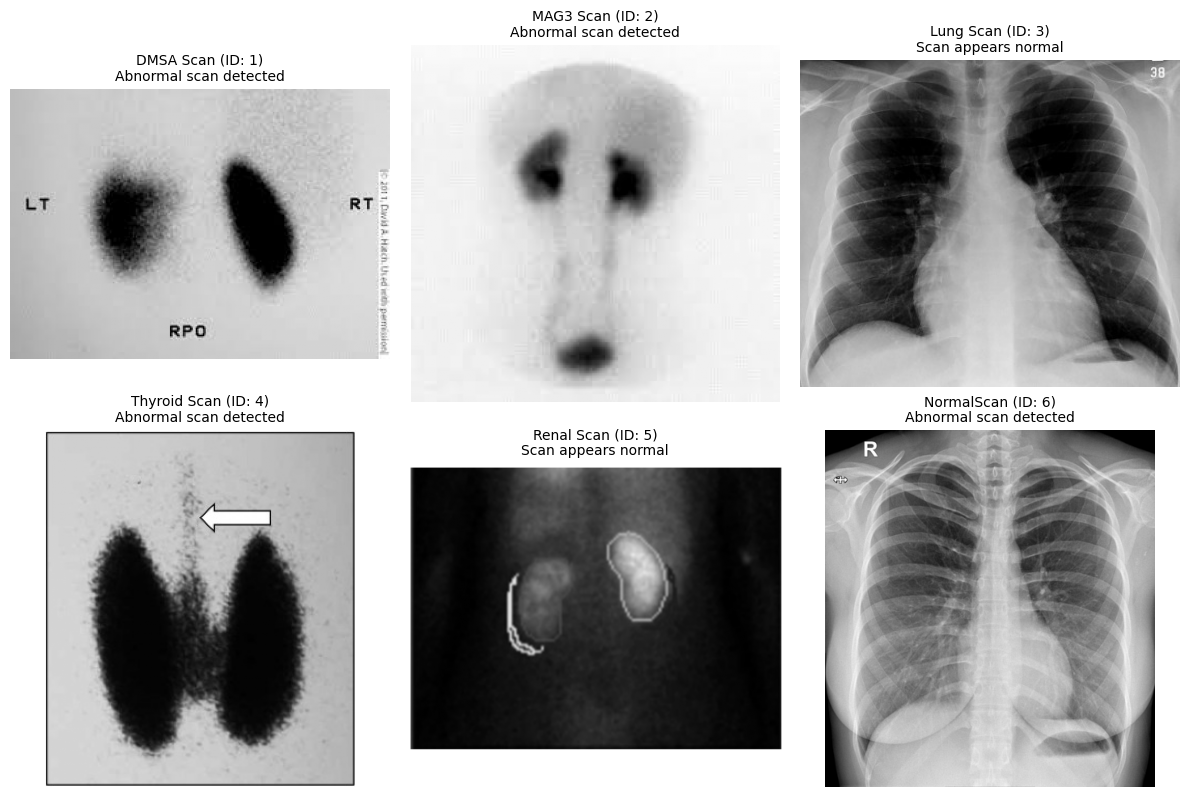

Reports generated and saved as 'medical_reports.txt'.


In [101]:
# Doctor's name
doctor_name = "Dr. Aneeqa Jabeen"  # Replace with actual doctor's name

# Process the images and generate reports
reports = process_and_generate_reports(file_paths, titles, doctor_name)

# Save reports to a text file
with open("medical_reports.txt", "w") as f:
    for report in reports:
        f.write(report + "\n\n")  # Use the correct `report` variable
print("Reports generated and saved as 'medical_reports.txt'.")

NameError: name 'reports' is not defined

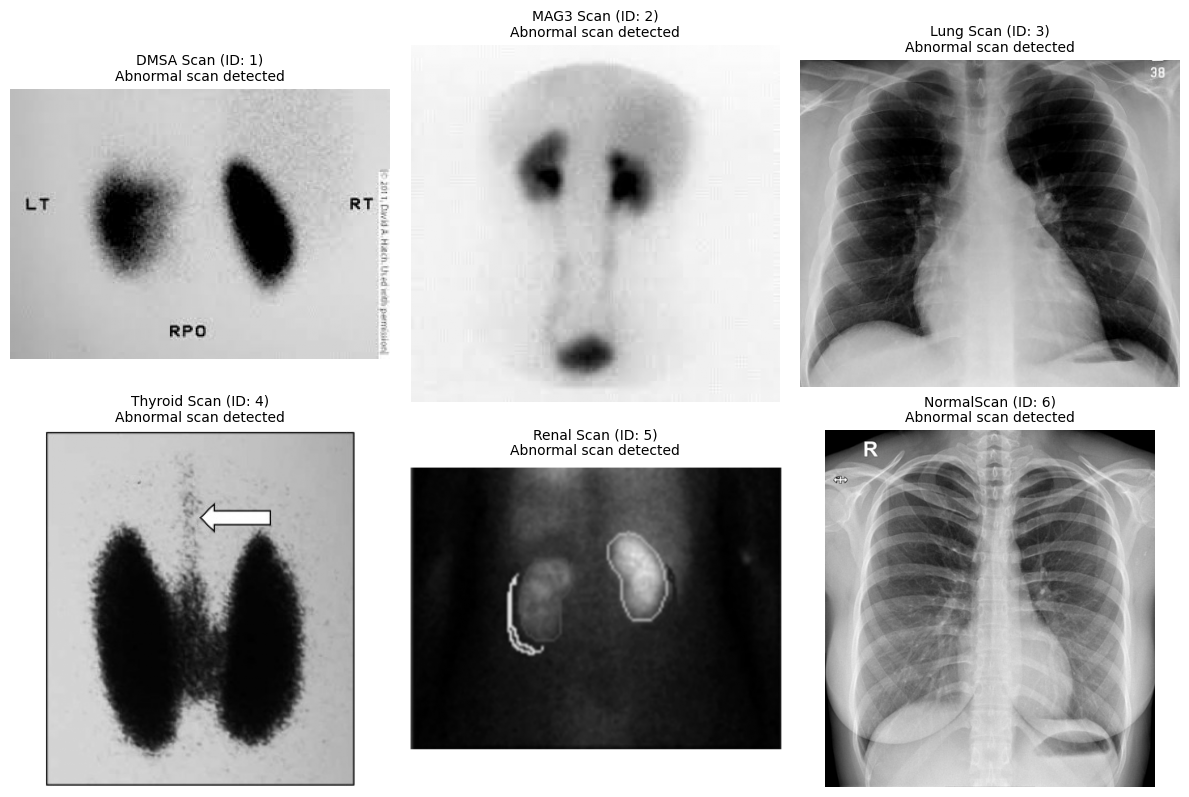

In [57]:
# Doctor's name
doctor_name = "Dr. Lubna Jadoon"  # Replace with actual doctor's name

# Process the images and generate reports
process_and_generate_reports(file_paths, titles, doctor_name)